In [16]:
import os
from utils.config import GRAPH_SAVE_FOLDER, DATA_FOLDER
from utils.plotter import plot_line_comparison


In [17]:
# import pandas as pd

# data_dir = os.path.join(DATA_FOLDER)
# extra_tag = f"Starlink_channel_specs_250MHz_10.5GHz"    
# tagged_folder = os.path.join(GRAPH_SAVE_FOLDER, extra_tag)

# # Ensure the tagged folder exists
# os.makedirs(tagged_folder, exist_ok=True)

# df = pd.read_csv('Satellite_Australia_Simulation_Log.csv')
# df = pd.read_csv('./250mhz_Data_10.5Ghz/Satellite_Australia_Simulation_Log.csv')

In [18]:
# import pandas as pd

# data_dir = os.path.join(DATA_FOLDER)
# extra_tag = f"Starlink_BGAN"    
# tagged_folder = os.path.join(GRAPH_SAVE_FOLDER, extra_tag)

# # Ensure the tagged folder exists
# os.makedirs(tagged_folder, exist_ok=True)

# df = pd.read_csv('Satellite_Australia_Simulation_Log.csv')
# # df = pd.read_csv('./250mhz_Data_10.5Ghz/Satellite_Australia_Simulation_Log.csv')

In [19]:
import pandas as pd

data_dir = os.path.join(DATA_FOLDER)
extra_tag = f"starlink_downlink"    
tagged_folder = os.path.join(GRAPH_SAVE_FOLDER, extra_tag)

# Ensure the tagged folder exists
os.makedirs(tagged_folder, exist_ok=True)

df = pd.read_csv('./data/Satellite_Australia_Simulation_Log_starlink_downlink.csv')

In [20]:
import pandas as pd

data_dir = os.path.join(DATA_FOLDER)
extra_tag = f"starlink_uplink"    
tagged_folder = os.path.join(GRAPH_SAVE_FOLDER, extra_tag)

# Ensure the tagged folder exists
os.makedirs(tagged_folder, exist_ok=True)

df = pd.read_csv('./data/Satellite_Australia_Simulation_Log_starlink_uplink.csv')

In [21]:
import pandas as pd
import re

# Step 1: Drop columns that are all zeros or all NaN
df = df.drop(columns=[col for col in df.columns if ((df[col] == 0) | (df[col].isna())).all()])

# Step 2: Get max satellite ID from column names
sat_ids = [int(match.group(1)) for col in df.columns if (match := re.match(r'LEO(\d+)_', col))]
max_sat_id = max(sat_ids) if sat_ids else -1

print("Max satellite ID found:", max_sat_id)

# Step 3: Track satellites with access
possible_sat_conn_ids = []

for i in range(max_sat_id + 1):
    sat_id = f'LEO{i}'

    # Check access columns
    sydney_access_col = f'{sat_id}_Sydney_Access'
    melbourne_access_col = f'{sat_id}_Melbourne_Access'

    # Check if access columns exist and have any True values
    # .fillna(False) ensures we treat NaN as False
    # .any() checks if there is at least one True value
    sydney_access_ok = sydney_access_col in df.columns and df[sydney_access_col].fillna(False).any()
    melbourne_access_ok = melbourne_access_col in df.columns and df[melbourne_access_col].fillna(False).any()

    if sydney_access_ok and melbourne_access_ok:
        possible_sat_conn_ids.append(sat_id)
    else:
        # Drop base satellite info if no access
        base_cols = [f'{sat_id}_Name', f'{sat_id}_Lat', f'{sat_id}_Lon', f'{sat_id}_Freq_Hz']
        existing_cols_to_drop = [col for col in base_cols if col in df.columns]
        df = df.drop(columns=existing_cols_to_drop)

print("Satellites with possible connection:", possible_sat_conn_ids)
print("length(Satellites with possible connection):", len(possible_sat_conn_ids))


Max satellite ID found: 144
Satellites with possible connection: ['LEO20', 'LEO21', 'LEO22', 'LEO23', 'LEO24', 'LEO31', 'LEO32', 'LEO33', 'LEO34', 'LEO35', 'LEO43', 'LEO44', 'LEO45', 'LEO46', 'LEO54', 'LEO55', 'LEO56', 'LEO57', 'LEO65', 'LEO66', 'LEO67', 'LEO68', 'LEO69', 'LEO76', 'LEO77', 'LEO78', 'LEO79', 'LEO80']
length(Satellites with possible connection): 28


In [22]:
# Collect all satellite-related columns NOT in possible_sat_conn_ids to drop
cols_to_drop = []

for col in df.columns:
    # Extract satellite id number from column name if it matches pattern
    match = re.match(r'(LEO\d+)_', col)
    if match:
        sat_id = match.group(1)
        # If satellite not in possible_sat_conn_ids, mark its columns for deletion
        if sat_id not in possible_sat_conn_ids:
            cols_to_drop.append(col)

# Drop those columns
df = df.drop(columns=cols_to_drop)

print("Remaining columns after cleanup:", df.columns.tolist())


Remaining columns after cleanup: ['Time', 'LEO20_Name', 'LEO20_Lat', 'LEO20_Lon', 'LEO20_Freq_Hz', 'LEO20_Sydney_Access', 'LEO20_Sydney_SNR_dB', 'LEO20_Sydney_RSSI_dBm', 'LEO20_Sydney_Throughput', 'LEO20_Sydney_BER_QPSK', 'LEO20_Sydney_BER_MQAM', 'LEO20_Sydney_Latency', 'LEO20_Sydney_TimeOut', 'LEO20_Melbourne_Access', 'LEO20_Melbourne_SNR_dB', 'LEO20_Melbourne_RSSI_dBm', 'LEO20_Melbourne_Throughput', 'LEO20_Melbourne_BER_QPSK', 'LEO20_Melbourne_BER_MQAM', 'LEO20_Melbourne_Latency', 'LEO20_Melbourne_TimeOut', 'LEO21_Name', 'LEO21_Lat', 'LEO21_Lon', 'LEO21_Freq_Hz', 'LEO21_Sydney_Access', 'LEO21_Sydney_SNR_dB', 'LEO21_Sydney_RSSI_dBm', 'LEO21_Sydney_Throughput', 'LEO21_Sydney_BER_QPSK', 'LEO21_Sydney_BER_MQAM', 'LEO21_Sydney_Latency', 'LEO21_Sydney_TimeOut', 'LEO21_Melbourne_Access', 'LEO21_Melbourne_SNR_dB', 'LEO21_Melbourne_RSSI_dBm', 'LEO21_Melbourne_Throughput', 'LEO21_Melbourne_BER_QPSK', 'LEO21_Melbourne_BER_MQAM', 'LEO21_Melbourne_Latency', 'LEO21_Melbourne_TimeOut', 'LEO22_Name'

In [23]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is loaded into 'df'

# Identify unique satellite IDs
satellite_ids = sorted(list(set([col.split('_')[0] for col in df.columns if col.startswith('LEO') and '_' in col])))

results = []

# Iterate through each row (representing a time index)
for index, row in df.iterrows():
    best_sydney = {'SAT_ID': None, 'BEST_SNR': -np.inf, 'BEST_RSSI': -np.inf, 'BEST_Thrpt': -np.inf,
                   'BEST_BER_MQAM': np.inf, 'BEST_BER_QPSK': np.inf, 'BEST_Latency': np.inf}
    best_melbourne = {'SAT_ID': None, 'BEST_SNR': -np.inf, 'BEST_RSSI': -np.inf, 'BEST_Thrpt': -np.inf,
                     'BEST_BER_MQAM': np.inf, 'BEST_BER_QPSK': np.inf, 'BEST_Latency': np.inf}

    for sat_id in satellite_ids:
        # Sydney data
        sydney_snr = row.get(f'{sat_id}_Sydney_SNR_dB')
        sydney_rssi = row.get(f'{sat_id}_Sydney_RSSI_dBm')
        sydney_thrpt = row.get(f'{sat_id}_Sydney_Throughput')
        sydney_ber_mqam = row.get(f'{sat_id}_Sydney_BER_MQAM')
        sydney_ber_qpsk = row.get(f'{sat_id}_Sydney_BER_QPSK')
        sydney_latency = row.get(f'{sat_id}_Sydney_Latency')

        if pd.notna(sydney_snr) and sydney_snr > best_sydney['BEST_SNR']:
            best_sydney['SAT_ID'] = sat_id
            best_sydney['BEST_SNR'] = sydney_snr
            best_sydney['BEST_RSSI'] = sydney_rssi
            best_sydney['BEST_Thrpt'] = sydney_thrpt
            best_sydney['BEST_BER_MQAM'] = sydney_ber_mqam
            best_sydney['BEST_BER_QPSK'] = sydney_ber_qpsk
            best_sydney['BEST_Latency'] = sydney_latency
        elif pd.notna(sydney_snr) and sydney_snr == best_sydney['BEST_SNR']:
            # Handle ties - you might want a specific tie-breaking logic
            pass

        # Melbourne data
        melbourne_snr = row.get(f'{sat_id}_Melbourne_SNR_dB')
        melbourne_rssi = row.get(f'{sat_id}_Melbourne_RSSI_dBm')
        melbourne_thrpt = row.get(f'{sat_id}_Melbourne_Throughput')
        melbourne_ber_mqam = row.get(f'{sat_id}_Melbourne_BER_MQAM')
        melbourne_ber_qpsk = row.get(f'{sat_id}_Melbourne_BER_QPSK')
        melbourne_latency = row.get(f'{sat_id}_Melbourne_Latency')

        if pd.notna(melbourne_snr) and melbourne_snr > best_melbourne['BEST_SNR']:
            best_melbourne['SAT_ID'] = sat_id
            best_melbourne['BEST_SNR'] = melbourne_snr
            best_melbourne['BEST_RSSI'] = melbourne_rssi
            best_melbourne['BEST_Thrpt'] = melbourne_thrpt
            best_melbourne['BEST_BER_MQAM'] = melbourne_ber_mqam
            best_melbourne['BEST_BER_QPSK'] = melbourne_ber_qpsk
            best_melbourne['BEST_Latency'] = melbourne_latency
        elif pd.notna(melbourne_snr) and melbourne_snr == best_melbourne['BEST_SNR']:
            # Handle ties - you might want a specific tie-breaking logic
            pass

    results.append({
        'Time': row['Time'],
        'Sydney_Best_SAT_ID': best_sydney['SAT_ID'],
        'Sydney_BEST_SNR': best_sydney['BEST_SNR'],
        'Sydney_BEST_RSSI': best_sydney['BEST_RSSI'],
        'Sydney_BEST_Thrpt': best_sydney['BEST_Thrpt'] / (1024 * 1024),  # Convert to Mbps
        'Sydney_BEST_BER_MQAM': best_sydney['BEST_BER_MQAM'],
        'Sydney_BEST_BER_QPSK': best_sydney['BEST_BER_QPSK'],
        'Sydney_BEST_Latency': best_sydney['BEST_Latency'] * 1000,  # Convert to ms,
        'Melbourne_Best_SAT_ID': best_melbourne['SAT_ID'],
        'Melbourne_BEST_SNR': best_melbourne['BEST_SNR'],
        'Melbourne_BEST_RSSI': best_melbourne['BEST_RSSI'],
        'Melbourne_BEST_Thrpt': best_melbourne['BEST_Thrpt'] / (1024 * 1024),  # Convert to Mbps
        'Melbourne_BEST_BER_MQAM': best_melbourne['BEST_BER_MQAM'],
        'Melbourne_BEST_BER_QPSK': best_melbourne['BEST_BER_QPSK'],
        'Melbourne_BEST_Latency': best_melbourne['BEST_Latency'] * 1000,  # Convert to ms
    })

# Create the new DataFrame
best_sinr_df = pd.DataFrame(results)

print(best_sinr_df)

best_sinr_df.to_csv(f"{extra_tag}_Best_Satellite_Australia_Simulation_Log_cleaned.csv")

                    Time Sydney_Best_SAT_ID  Sydney_BEST_SNR  \
0   10-Apr-2025 12:00:00              LEO35         1.019908   
1   10-Apr-2025 12:00:30              LEO35         2.700930   
2   10-Apr-2025 12:01:00              LEO35         6.697973   
3   10-Apr-2025 12:01:30              LEO35         7.359124   
4   10-Apr-2025 12:02:00              LEO35         4.456983   
..                   ...                ...              ...   
56  10-Apr-2025 12:28:00              LEO76        -0.295012   
57  10-Apr-2025 12:28:30              LEO76        -0.210312   
58  10-Apr-2025 12:29:00              LEO32         2.899183   
59  10-Apr-2025 12:29:30              LEO76         2.060447   
60  10-Apr-2025 12:30:00              LEO76         6.940611   

    Sydney_BEST_RSSI  Sydney_BEST_Thrpt  Sydney_BEST_BER_MQAM  \
0        -121.149671         168.703936              0.230629   
1        -119.468648         217.047011              0.203117   
2        -115.471605         358.294

In [24]:
plot_line_comparison(
    best_sinr_df,
    columns=['Sydney_BEST_Thrpt', 'Melbourne_BEST_Thrpt'],
    labels=['Sydney_BEST_Thrpt', 'Melbourne_BEST_Thrpt'],
    xlabel='Time (m) ',
    ylabel='Latency (ms)',
    title=f'Latency for Starlink Satellites',
    filename=f"{extra_tag}_{sat_id}_Melbourne_latency",
    folder=f"./graphs/{extra_tag}_best"  # Adjust the folder path as needed
)

In [25]:
best_sinr_df['Sydney_BEST_Thrpt'].describe()

count     61.000000
mean     297.684368
std      135.885665
min       94.709780
25%      182.193205
50%      275.005529
75%      397.577049
max      622.010356
Name: Sydney_BEST_Thrpt, dtype: float64

In [26]:
best_sinr_df['Melbourne_BEST_Thrpt'].describe()

count     61.000000
mean     467.377752
std      169.962001
min      164.648998
25%      341.530793
50%      447.561876
75%      597.438318
max      824.628891
Name: Melbourne_BEST_Thrpt, dtype: float64

In [27]:
best_sinr_df['Sydney_BEST_BER_QPSK'].describe()

count    6.100000e+01
mean     2.676430e-02
std      3.308253e-02
min      2.428166e-10
25%      3.074946e-04
50%      9.077092e-03
75%      4.610511e-02
max      1.402463e-01
Name: Sydney_BEST_BER_QPSK, dtype: float64

In [28]:
best_sinr_df['Melbourne_BEST_BER_QPSK'].describe()

count    6.100000e+01
mean     4.536410e-03
std      1.147944e-02
min      2.553879e-25
25%      2.535675e-09
50%      4.141140e-05
75%      1.810422e-03
max      5.908937e-02
Name: Melbourne_BEST_BER_QPSK, dtype: float64

In [29]:
for col in best_sinr_df.columns:
    print("-" * 20)
    print(f"{col}: {best_sinr_df[col].describe()}")
    print("-" * 20)

--------------------
Time: count                       61
unique                      61
top       10-Apr-2025 12:00:00
freq                         1
Name: Time, dtype: object
--------------------
--------------------
Sydney_Best_SAT_ID: count        61
unique       11
top       LEO34
freq          8
Name: Sydney_Best_SAT_ID, dtype: object
--------------------
--------------------
Sydney_BEST_SNR: count    61.000000
mean      4.701948
std       3.812063
min      -2.348154
25%       1.515780
50%       4.456983
75%       7.682699
max      12.870642
Name: Sydney_BEST_SNR, dtype: float64
--------------------
--------------------
Sydney_BEST_RSSI: count     61.000000
mean    -117.467630
std        3.812063
min     -124.517733
25%     -120.653799
50%     -117.712595
75%     -114.486880
max     -109.298936
Name: Sydney_BEST_RSSI, dtype: float64
--------------------
--------------------
Sydney_BEST_Thrpt: count     61.000000
mean     297.684368
std      135.885665
min       94.709780
25%     

In [53]:
best_sinr_df.columns

Index(['Time', 'Sydney_Best_SAT_ID', 'Sydney_BEST_SNR', 'Sydney_BEST_RSSI',
       'Sydney_BEST_Thrpt', 'Sydney_BEST_BER_MQAM', 'Sydney_BEST_BER_QPSK',
       'Sydney_BEST_Latency', 'Melbourne_Best_SAT_ID', 'Melbourne_BEST_SNR',
       'Melbourne_BEST_RSSI', 'Melbourne_BEST_Thrpt',
       'Melbourne_BEST_BER_MQAM', 'Melbourne_BEST_BER_QPSK',
       'Melbourne_BEST_Latency'],
      dtype='object')

In [15]:
best_sinr_df

,Time,Sydney_Best_SAT_ID,Sydney_BEST_SNR,Sydney_BEST_RSSI,Sydney_BEST_Thrpt,Sydney_BEST_BER_MQAM,Sydney_BEST_BER_QPSK,Sydney_BEST_Latency,Melbourne_Best_SAT_ID,Melbourne_BEST_SNR,Melbourne_BEST_RSSI,Melbourne_BEST_Thrpt,Melbourne_BEST_BER_MQAM,Melbourne_BEST_BER_QPSK,Melbourne_BEST_Latency
0,10-Apr-2025 12:00:00,LEO35,-1.502024,-121.453115,184.055200,0.265039,0.117095,3.272486,LEO35,4.186606,-115.764485,442.708393,0.175859,0.011009,2.843849
1,10-Apr-2025 12:00:30,LEO35,0.014226,-119.936865,238.982391,0.245322,0.078310,2.956855,LEO35,5.235797,-114.715293,504.796229,0.155190,0.004882,3.097310
2,10-Apr-2025 12:01:00,LEO35,3.138661,-116.812430,384.695336,0.195359,0.021190,2.782686,LEO35,-1.346424,-121.297515,189.215666,0.263146,0.112921,3.473456
3,10-Apr-2025 12:01:30,LEO35,3.955374,-115.995717,429.548857,0.180268,0.012877,2.776973,LEO68,4.990121,-114.960970,489.921698,0.160118,0.006002,3.531744
4,10-Apr-2025 12:02:00,LEO35,2.197404,-117.753686,336.328556,0.211743,0.034279,2.940764,LEO68,5.304912,-114.646178,509.016250,0.153795,0.004598,3.058894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,10-Apr-2025 12:28:00,LEO76,-3.041519,-122.992610,138.643714,0.282259,0.159525,4.804781,LEO65,-1.735557,-121.686648,176.510958,0.267827,0.123416,3.211717
57,10-Apr-2025 12:28:30,LEO76,-2.659264,-122.610355,148.985273,0.278232,0.148882,4.175977,LEO65,-0.732662,-120.683753,210.627031,0.255392,0.096832,3.195312
58,10-Apr-2025 12:29:00,LEO32,-0.421439,-120.372530,222.134106,0.251281,0.088952,4.436372,LEO65,4.262965,-115.688126,447.097086,0.174390,0.010437,3.326652
59,10-Apr-2025 12:29:30,LEO76,-0.169483,-120.120574,231.772435,0.247864,0.082738,3.009550,LEO65,3.595761,-116.355330,409.481013,0.187008,0.016199,3.589389


In [19]:
for sat_id in possible_sat_conn_ids:
    print(f"Processing satellite ID: {sat_id}")
    sat_col = [s for s in df.columns.to_list() if sat_id in s]
    print("sat_col:", sat_col)
    print(df[sat_col])
    break


Processing satellite ID: LEO20
sat_col: ['LEO20_Name', 'LEO20_Lat', 'LEO20_Lon', 'LEO20_Freq_Hz', 'LEO20_Sydney_Access', 'LEO20_Sydney_SNR_dB', 'LEO20_Sydney_RSSI_dBm', 'LEO20_Sydney_Throughput', 'LEO20_Sydney_BER_QPSK', 'LEO20_Sydney_BER_MQAM', 'LEO20_Sydney_Latency', 'LEO20_Sydney_TimeOut', 'LEO20_Melbourne_Access', 'LEO20_Melbourne_SNR_dB', 'LEO20_Melbourne_RSSI_dBm', 'LEO20_Melbourne_Throughput', 'LEO20_Melbourne_BER_QPSK', 'LEO20_Melbourne_BER_MQAM', 'LEO20_Melbourne_Latency', 'LEO20_Melbourne_TimeOut']
   LEO20_Name  LEO20_Lat   LEO20_Lon  LEO20_Freq_Hz  LEO20_Sydney_Access  \
0         _20 -25.639253    2.791160    11100000000                    0   
1         _20 -27.041493    4.078029    11300000000                    0   
2         _20 -28.428947    5.400089    11700000000                    0   
3         _20 -29.800349    6.760010    10700000000                    0   
4         _20 -31.154346    8.160569    10700000000                    0   
..        ...        ...      

In [20]:
all_rssi_cols = [col for col in df.columns if re.search(r'_RSSI_dBm$', col)]
all_snr_cols = [col for col in df.columns if re.search(r'_SNR_dB$', col)]
all_thrpt_cols = [col for col in df.columns if re.search(r'_Throughput$', col)]
all_BER_QPSK_cols = [col for col in df.columns if re.search(r'_BER_QPSK$', col)]
all_BER_MQAM_cols = [col for col in df.columns if re.search(r'_BER_MQAM$', col)]
all_Latency_cols = [col for col in df.columns if re.search(r'Latency$', col)]
all_TimeOut_cols = [col for col in df.columns if re.search(r'TimeOut$', col)]

In [21]:
# df[all_thrpt_cols] = df[all_thrpt_cols] / (1024 * 1024) # Convert to Mbps
# df[all_Latency_cols] = df[all_Latency_cols] * 1000 # Convert to Mbps

KeyboardInterrupt: 

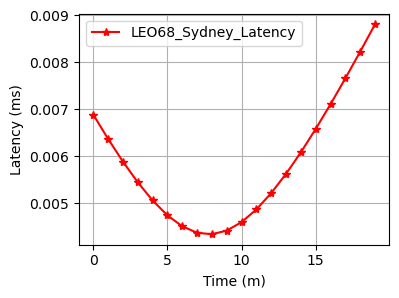

In [22]:
# Loop over each satellite in possible_sat_conn_ids
for sat_id in possible_sat_conn_ids:
    # Build Latency column names
    sydney_Latency_col = f'{sat_id}_Sydney_Latency'
    melbourne_Latency_col = f'{sat_id}_Melbourne_Latency'

    # Check which Latency columns exist
    sydney_exists = sydney_Latency_col in df.columns
    melbourne_exists = melbourne_Latency_col in df.columns

    # Skip if neither exists
    if not sydney_exists and not melbourne_exists:
        continue
    temp_tagged_folder = os.path.join(tagged_folder, "Latency")
    # Plot 
    if sydney_exists:
        plot_line_comparison(
            df,
            columns=[sydney_Latency_col],
            labels=[sydney_Latency_col],
            xlabel='Time (m)',
            ylabel='Latency (ms)',
            title=f'Latency for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Sydney_latency",
            folder=temp_tagged_folder
        )
    if melbourne_exists:
        plot_line_comparison(
            df,
            columns=[melbourne_Latency_col],
            labels=[melbourne_Latency_col],
            xlabel='Time (m) ',
            ylabel='Latency (ms)',
            title=f'Latency for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Melbourne_latency",
            folder=temp_tagged_folder
        )

In [ ]:
# Loop over each satellite in possible_sat_conn_ids
for sat_id in possible_sat_conn_ids:
    # Build Thrpt column names
    sydney_Thrpt_col = f'{sat_id}_Sydney_Throughput'
    melbourne_Thrpt_col = f'{sat_id}_Melbourne_Throughput'

    # Check which Thrpt columns exist
    sydney_exists = sydney_Thrpt_col in df.columns
    melbourne_exists = melbourne_Thrpt_col in df.columns

    # Skip if neither exists
    if not sydney_exists and not melbourne_exists:
        continue
    temp_tagged_folder = os.path.join(tagged_folder, "thrpt")
    # Plot 
    if sydney_exists:
        plot_line_comparison(
            df,
            columns=[sydney_Thrpt_col],
            labels=[sydney_Thrpt_col],
            xlabel='Time (m)',
            ylabel='Thrpt (Mbps)',
            title=f'Thrpt for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Sydney_thrpt",
            folder=temp_tagged_folder
        )
    if melbourne_exists:
        plot_line_comparison(
            df,
            columns=[melbourne_Thrpt_col],
            labels=[melbourne_Thrpt_col],
            xlabel='Time (m) ',
            ylabel='Thrpt (Mbps)',
            title=f'Thrpt for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Melbourne_thrpt",
            folder=temp_tagged_folder
        )

In [ ]:
# Loop over each satellite in possible_sat_conn_ids
for sat_id in possible_sat_conn_ids:
    # Build SNR column names
    sydney_SNR_col = f'{sat_id}_Sydney_SNR_dB'
    melbourne_SNR_col = f'{sat_id}_Melbourne_SNR_dB'

    # Check which SNR columns exist
    sydney_exists = sydney_SNR_col in df.columns
    melbourne_exists = melbourne_SNR_col in df.columns

    # Skip if neither exists
    if not sydney_exists and not melbourne_exists:
        continue
    # Plot 
    temp_tagged_folder = os.path.join(tagged_folder, "SNR")
    if sydney_exists:
        plot_line_comparison(
            df,
            columns=[sydney_SNR_col],
            labels=[sydney_SNR_col],
            xlabel='Time (m)',
            ylabel='SNR (dBm)',
            title=f'SNR for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Sydney_SNR",
            folder=temp_tagged_folder
        )
    if melbourne_exists:
        plot_line_comparison(
            df,
            columns=[melbourne_SNR_col],
            labels=[melbourne_SNR_col],
            xlabel='Time (m) ',
            ylabel='SNR (dBm)',
            title=f'SNR for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Melbourne_SNR",
            folder=temp_tagged_folder
        )

In [ ]:
# Loop over each satellite in possible_sat_conn_ids
for sat_id in possible_sat_conn_ids:
    # Build BER_QPSK column names
    sydney_BER_QPSK_col = f'{sat_id}_Sydney_BER_QPSK'
    melbourne_BER_QPSK_col = f'{sat_id}_Melbourne_BER_QPSK'

    # Check which BER_QPSK columns exist
    sydney_exists = sydney_BER_QPSK_col in df.columns
    melbourne_exists = melbourne_BER_QPSK_col in df.columns

    # Skip if neither exists
    if not sydney_exists and not melbourne_exists:
        continue
    # Plot 
    temp_tagged_folder = os.path.join(tagged_folder, "BER_QPSK")
    if sydney_exists:
        plot_line_comparison(
            df,
            columns=[sydney_BER_QPSK_col],
            labels=[sydney_BER_QPSK_col],
            xlabel='Time (m)',
            ylabel='BER_QPSK',
            title=f'BER_QPSK for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Sydney_BER_QPSK",
            folder=temp_tagged_folder
        )
    if melbourne_exists:
        plot_line_comparison(
            df,
            columns=[melbourne_BER_QPSK_col],
            labels=[melbourne_BER_QPSK_col],
            xlabel='Time (m) ',
            ylabel='BER_QPSK',
            title=f'BER_QPSK for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Melbourne_BER_QPSK",
            folder=temp_tagged_folder
        )

In [ ]:
# Loop over each satellite in possible_sat_conn_ids
for sat_id in possible_sat_conn_ids:
    # Build BER_MQAM column names
    sydney_BER_MQAM_col = f'{sat_id}_Sydney_BER_MQAM'
    melbourne_BER_MQAM_col = f'{sat_id}_Melbourne_BER_MQAM'

    # Check which BER_MQAM columns exist
    sydney_exists = sydney_BER_MQAM_col in df.columns
    melbourne_exists = melbourne_BER_MQAM_col in df.columns

    # Skip if neither exists
    if not sydney_exists and not melbourne_exists:
        continue
    # Plot 
    temp_tagged_folder = os.path.join(tagged_folder, "BER_MQAM")
    if sydney_exists:
        plot_line_comparison(
            df,
            columns=[sydney_BER_MQAM_col],
            labels=[sydney_BER_MQAM_col],
            xlabel='Time (m)',
            ylabel='BER_MQAM ',
            title=f'BER_MQAM for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Sydney_BER_MQAM",
            folder=temp_tagged_folder
        )
    if melbourne_exists:
        plot_line_comparison(
            df,
            columns=[melbourne_BER_MQAM_col],
            labels=[melbourne_BER_MQAM_col],
            xlabel='Time (m) ',
            ylabel='BER_MQAM ',
            title=f'BER_MQAM for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Melbourne_BER_MQAM",
            folder=temp_tagged_folder
        )

In [ ]:
# Loop over each satellite in possible_sat_conn_ids
for sat_id in possible_sat_conn_ids:
    # Build RSSI column names
    sydney_RSSI_col = f'{sat_id}_Sydney_RSSI_dBm'
    melbourne_RSSI_col = f'{sat_id}_Melbourne_RSSI_dBm'

    # Check which RSSI columns exist
    sydney_exists = sydney_RSSI_col in df.columns
    melbourne_exists = melbourne_RSSI_col in df.columns

    # Skip if neither exists
    if not sydney_exists and not melbourne_exists:
        continue
    # Plot 
    temp_tagged_folder = os.path.join(tagged_folder, "RSSI")
    if sydney_exists:
        plot_line_comparison(
            df,
            columns=[sydney_RSSI_col],
            labels=[sydney_RSSI_col],
            xlabel='Time (m)',
            ylabel='RSSI(dBm)',
            title=f'RSSI for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Sydney_RSSI",
            folder=temp_tagged_folder
        )
    if melbourne_exists:
        plot_line_comparison(
            df,
            columns=[melbourne_RSSI_col],
            labels=[melbourne_RSSI_col],
            xlabel='Time (m) ',
            ylabel='RSSI(dBm)',
            title=f'RSSI for Starlink Satellites',
            filename=f"{extra_tag}_{sat_id}_Melbourne_RSSI",
            folder=temp_tagged_folder
        )

In [ ]:
df.head(2)

,Time,LEO20_Name,LEO20_Lat,LEO20_Lon,LEO20_Freq_Hz,LEO20_Sydney_Access,LEO20_Sydney_SNR_dB,LEO20_Sydney_RSSI_dBm,LEO20_Sydney_Throughput,LEO20_Sydney_BER_QPSK,...,LEO88_Freq_Hz,LEO88_Sydney_Access,LEO88_Sydney_SNR_dB,LEO88_Sydney_RSSI_dBm,LEO88_Sydney_Throughput,LEO88_Sydney_BER_QPSK,LEO88_Sydney_BER_MQAM,LEO88_Sydney_Latency,LEO88_Sydney_TimeOut,LEO88_Melbourne_TimeOut
0,10-Apr-2025 12:00:00,_20,-25.639253,2.791160,11100000000,0,NaN,NaN,NaN,NaN,...,11700000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,10-Apr-2025 12:00:30,_20,-27.041493,4.078029,11300000000,0,NaN,NaN,NaN,NaN,...,11100000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [ ]:
for i, row in df.iterrows():
    # Get the highest value across all RSSI columns at the `i-th` row
    highest_rssi_at_i = df[all_rssi_cols].iloc[i].max()

    # Get the column name that has the highest RSSI value at the `i-th` index
    column_with_highest_rssi = df[all_rssi_cols].iloc[i].idxmax()

    print(f"Highest RSSI value at index {i}: {highest_rssi_at_i}")
    print(f"Column with the highest RSSI value at index {i}: {column_with_highest_rssi}")

Highest RSSI value at index 0: -115.764485236438
Column with the highest RSSI value at index 0: LEO35_Melbourne_RSSI_dBm
Highest RSSI value at index 1: -114.715293404594
Column with the highest RSSI value at index 1: LEO35_Melbourne_RSSI_dBm
Highest RSSI value at index 2: -116.812429716472
Column with the highest RSSI value at index 2: LEO35_Sydney_RSSI_dBm
Highest RSSI value at index 3: -114.96097014057
Column with the highest RSSI value at index 3: LEO68_Melbourne_RSSI_dBm
Highest RSSI value at index 4: -114.646178386542
Column with the highest RSSI value at index 4: LEO68_Melbourne_RSSI_dBm
Highest RSSI value at index 5: -114.568660235191
Column with the highest RSSI value at index 5: LEO68_Melbourne_RSSI_dBm
Highest RSSI value at index 6: -112.222252667522
Column with the highest RSSI value at index 6: LEO68_Melbourne_RSSI_dBm
Highest RSSI value at index 7: -112.342794503145
Column with the highest RSSI value at index 7: LEO68_Melbourne_RSSI_dBm
Highest RSSI value at index 8: -117.

In [ ]:
stats = df[all_rssi_cols].fillna(0).describe().T
stats.to_csv(os.path.join('./', 'rssi_stats.csv'))

In [ ]:
stats = df[all_rssi_cols].describe().T
stats.to_csv(os.path.join('./', 'rssi_stats.csv'))

In [ ]:
stats = df[all_snr_cols].describe().T
stats.to_csv(os.path.join('./', 'snr_stats.csv'))

In [ ]:

# Highest value per column
max_per_column = df[all_rssi_cols].max()

# Highest value among all columns
overall_max = df[all_rssi_cols].max().max()

# Displaying results
print("\nHighest Value per Column:\n", max_per_column)
print("\nHighest Value Among All Columns:", overall_max)


Highest Value per Column:
 LEO20_Sydney_RSSI_dBm      -148.295443
LEO20_Melbourne_RSSI_dBm   -134.922692
LEO21_Sydney_RSSI_dBm      -137.625636
LEO21_Melbourne_RSSI_dBm   -129.573836
LEO22_Sydney_RSSI_dBm      -131.267904
LEO22_Melbourne_RSSI_dBm   -127.442422
LEO23_Sydney_RSSI_dBm      -125.463062
LEO23_Melbourne_RSSI_dBm   -123.662092
LEO24_Sydney_RSSI_dBm      -129.809117
LEO24_Melbourne_RSSI_dBm   -139.395803
LEO31_Sydney_RSSI_dBm      -134.859752
LEO31_Melbourne_RSSI_dBm   -121.556846
LEO32_Sydney_RSSI_dBm      -110.554143
LEO32_Melbourne_RSSI_dBm   -108.541788
LEO33_Sydney_RSSI_dBm      -112.088481
LEO33_Melbourne_RSSI_dBm   -107.525019
LEO34_Sydney_RSSI_dBm      -115.756424
LEO34_Melbourne_RSSI_dBm   -110.302245
LEO35_Sydney_RSSI_dBm      -115.995717
LEO35_Melbourne_RSSI_dBm   -114.715293
LEO42_Melbourne_RSSI_dBm   -150.120775
LEO43_Sydney_RSSI_dBm      -128.704046
LEO43_Melbourne_RSSI_dBm   -127.825126
LEO44_Sydney_RSSI_dBm      -134.485834
LEO44_Melbourne_RSSI_dBm   -126.9481

In [ ]:
# import matplotlib.pyplot as plt
# import re

# all_rssi_cols = [col for col in df.columns if re.search(r'_RSSI_dBm$', col)]
# all_snr_cols = [col for col in df.columns if re.search(r'_SNR_dB$', col)]

# # Loop over each satellite in possible_sat_conn_ids
# for sat_id in possible_sat_conn_ids:
#     # Build RSSI column names
#     sydney_RSSI_col = f'{sat_id}_Sydney_RSSI_dBm'
#     melbourne_RSSI_col = f'{sat_id}_Melbourne_RSSI_dBm'

#     # Check which RSSI columns exist
#     sydney_exists = sydney_RSSI_col in df.columns
#     melbourne_exists = melbourne_RSSI_col in df.columns

#     # Skip if neither exists
#     if not sydney_exists and not melbourne_exists:
#         continue

#     plt.figure(figsize=(10, 5))
#     plt.title(f'RSSI vs Time for {sat_id}')
#     plt.xlabel('Time')
#     plt.ylabel('RSSI (dB)')

#     if sydney_exists:
#         plt.plot(df['Time'], df[sydney_RSSI_col], label='Sydney', color='blue')
#     if melbourne_exists:
#         plt.plot(df['Time'], df[melbourne_RSSI_col], label='Melbourne', color='green')

#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
